In [2]:
import os
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
from datetime import datetime
import importlib
import global_settings
importlib.reload(global_settings)


<module 'global_settings' from 'C:\\Users\\AO_HVN_ITS_LABO_DWH\\Desktop\\CHECK_CEDX\\global_settings.py'>

In [3]:
setts = global_settings.Settings()

root_folder = setts.root_folder
#input_tmp_folder = root_folder + "/data"
input_tmp_folder = setts.input_folder
#output_folder = root_folder + "/data/tmp"
output_folder = setts.tmp1_folder
year_limit = setts.year_limit
#cutoff = setts.month_last

Directory found: D:\Software\temp\CeDX\data_2024_05/data
Directory found: D:\Software\temp\CeDX\data_2024_05/data/tmp
Directory found: D:\Software\temp\CeDX\data_2024_05/data/tmp2
Directory created: D:\Software\temp\CeDX\data_2024_05/output


# Merge and add Field/Business field to chatbot data

In [4]:
def create_additional_data(merged_data):
    # Business and Field
    merged_data['Business'] = np.nan
    merged_data.loc[merged_data['User says'].str.contains('xe máy|xe số|sh|tay côn|wave|blade|Future|Cub|Vision|Lead|SH Mode|Air|Scoopy|Vario|ADV|PCX|MSX|Winner|CBR|CXM|CB500X|CB650R|CB1000R|CBR1000RR-R|Fireblade|Africa Twin|CRF1100L Africa Twin Adventure Sports|Rebel 300|xe ga|tay ga|head|gold', na = False, case = False), 'Business Field'] = 'MC'
    merged_data.loc[merged_data['Bot answer text'].str.contains('xe máy|xe số|sh|tay côn|wave|blade|Future|Cub|Vision|Lead|SH Mode|Air|Scoopy|Vario|ADV|PCX|MSX|Winner|CBR|CXM|CB500X|CB650R|CB1000R|CBR1000RR-R|Fireblade|Africa Twin|CRF1100L Africa Twin Adventure Sports|Rebel 300|xe ga|tay ga|head|gold', na = False, case = False), 'Business Field'] = 'MC'
    merged_data.loc[merged_data['User says'].str.contains('ô tô|accord|cr|br|city|civic|hr', na = False, case = False), 'Business Field'] = 'AM'
    merged_data.loc[merged_data['Bot answer text'].str.contains('ô tô|accord|cr|br|city|civic|hr', na = False, case = False), 'Business Field'] = 'AM'
    merged_data['Business'].fillna('Other', inplace = True)
    merged_data['Field'] = np.nan
    merged_data.loc[merged_data['User says'].str.contains('bảo hành|bảo dưỡng|lịch|gia hạn|ktđk|kiểm tra|định kỳ|phí|thay|dầu|hotline|tư vấn viên|sửa chữa|phụ tùng|phụ tùng|hỏng|e-voucher', na = False, case = False), 'Field'] = 'Service'
    merged_data.loc[merged_data['User says'].str.contains('thông tin|giá|chi tiết|khuyến mại|ô tô|xe máy|khuyến mãi|mua|giảmxe máy|xe số|sh|tay côn|wave|blade|Future|Cub|Vision|Lead|SH Mode|Air|Scoopy|Vario|ADV|PCX|MSX|Winner|CBR|CXM|CB500X|CB650R|CB1000R|CBR1000RR-R|Fireblade|Africa Twin|CRF1100L Africa Twin Adventure Sports|Rebel 300|xe ga|tay ga|head|gold|xe máy|xe số|sh|tay côn|wave|blade|Future|Cub|Vision|Lead|SH Mode|Air|Scoopy|Vario|ADV|PCX|MSX|Winner|CBR|CXM|CB500X|CB650R|CB1000R|CBR1000RR-R|Fireblade|Africa Twin|CRF1100L Africa Twin Adventure Sports|Rebel 300|xe ga|tay ga|head|gold', na = False, case = False), 'Field'] = 'Product'
    merged_data['Field'].fillna('Other', inplace = True)
    return merged_data

In [5]:
def merge_xlsx_files(folder_path_og, out_path):
    # Specify the folders to consider for merging
    folders_to_merge = ['Bot_History_20200801_20230930_Part1', 
                        'Bot_History_20200801_20230930_Part2', 
                        'Bot_History_20201001_20231031_Part3',
                        'Bot_History_20231201_20231231_Part4',]

    # Create an empty DataFrame to store the merged data
    merged_data = pd.DataFrame()

    # Iterate over the specified folders and merge the XLSX files
    for folder in folders_to_merge:
        folder_path = folder_path_og +'\\'+ folder
        print(folder_path)
        if os.path.isdir(folder_path):
            file_list = []
            for file in os.listdir(folder_path):
                if file.endswith(".xlsx"):
                    file_list.append(os.path.join(folder_path, file))

            # Merge the XLSX files within the folder
            for file_path in file_list:
                print(file_path)
                df = pd.read_excel(file_path, skiprows=6)  # Read the XLSX file into a DataFrame
                merged_data = pd.concat([merged_data, df], ignore_index=True)  # Merge the data
                #merged_data = create_additional_data(merged_data)
                #print(merged_data.head())
    # Write the merged DataFrame to a new XLSX file
    
    merged_file_path = out_path + "/merged_chatbot_data.csv"
    merged_data = create_additional_data(merged_data)
    merged_data.to_csv(merged_file_path, index=False)

    print("Merging completed. Merged data saved to:", merged_file_path)

# Example usage
folder_path = r"\\hvn-file01-prd\ADM IT\Project Document\2022_CeDX engagement\09.Project_Management\9. Upate Data\Mar_2024\4. My Honda"
out_path = input_tmp_folder
merge_xlsx_files(folder_path, out_path)

\\hvn-file01-prd\ADM IT\Project Document\2022_CeDX engagement\09.Project_Management\9. Upate Data\Mar_2024\4. My Honda\Bot_History_20200801_20230930_Part1
\\hvn-file01-prd\ADM IT\Project Document\2022_CeDX engagement\09.Project_Management\9. Upate Data\Mar_2024\4. My Honda\Bot_History_20200801_20230930_Part1\PROD-CRM History from 20200801072941 to 20200813154137.xlsx
\\hvn-file01-prd\ADM IT\Project Document\2022_CeDX engagement\09.Project_Management\9. Upate Data\Mar_2024\4. My Honda\Bot_History_20200801_20230930_Part1\PROD-CRM History from 20200813154207 to 20200828154503.xlsx
\\hvn-file01-prd\ADM IT\Project Document\2022_CeDX engagement\09.Project_Management\9. Upate Data\Mar_2024\4. My Honda\Bot_History_20200801_20230930_Part1\PROD-CRM History from 20200828154525 to 20200910194826.xlsx
\\hvn-file01-prd\ADM IT\Project Document\2022_CeDX engagement\09.Project_Management\9. Upate Data\Mar_2024\4. My Honda\Bot_History_20200801_20230930_Part1\PROD-CRM History from 20200910194830 to 20200

\\hvn-file01-prd\ADM IT\Project Document\2022_CeDX engagement\09.Project_Management\9. Upate Data\Mar_2024\4. My Honda\Bot_History_20200801_20230930_Part1\PROD-CRM History from 20211004131133 to 20211015211519.xlsx
\\hvn-file01-prd\ADM IT\Project Document\2022_CeDX engagement\09.Project_Management\9. Upate Data\Mar_2024\4. My Honda\Bot_History_20200801_20230930_Part1\PROD-CRM History from 20211015211524 to 20211027203632.xlsx
\\hvn-file01-prd\ADM IT\Project Document\2022_CeDX engagement\09.Project_Management\9. Upate Data\Mar_2024\4. My Honda\Bot_History_20200801_20230930_Part1\PROD-CRM History from 20211027203634 to 20211107171954.xlsx
\\hvn-file01-prd\ADM IT\Project Document\2022_CeDX engagement\09.Project_Management\9. Upate Data\Mar_2024\4. My Honda\Bot_History_20200801_20230930_Part1\PROD-CRM History from 20211107172003 to 20211118174931.xlsx
\\hvn-file01-prd\ADM IT\Project Document\2022_CeDX engagement\09.Project_Management\9. Upate Data\Mar_2024\4. My Honda\Bot_History_20200801_

\\hvn-file01-prd\ADM IT\Project Document\2022_CeDX engagement\09.Project_Management\9. Upate Data\Mar_2024\4. My Honda\Bot_History_20200801_20230930_Part2\PROD-CRM History from 20221125065809 to 20221207064819.xlsx
\\hvn-file01-prd\ADM IT\Project Document\2022_CeDX engagement\09.Project_Management\9. Upate Data\Mar_2024\4. My Honda\Bot_History_20200801_20230930_Part2\PROD-CRM History from 20221207064830 to 20221219105233.xlsx
\\hvn-file01-prd\ADM IT\Project Document\2022_CeDX engagement\09.Project_Management\9. Upate Data\Mar_2024\4. My Honda\Bot_History_20200801_20230930_Part2\PROD-CRM History from 20221219105234 to 20221231094845.xlsx
\\hvn-file01-prd\ADM IT\Project Document\2022_CeDX engagement\09.Project_Management\9. Upate Data\Mar_2024\4. My Honda\Bot_History_20200801_20230930_Part2\PROD-CRM History from 20221231094848 to 20230112172613.xlsx
\\hvn-file01-prd\ADM IT\Project Document\2022_CeDX engagement\09.Project_Management\9. Upate Data\Mar_2024\4. My Honda\Bot_History_20200801_

\\hvn-file01-prd\ADM IT\Project Document\2022_CeDX engagement\09.Project_Management\9. Upate Data\Mar_2024\4. My Honda\Bot_History_20231201_20231231_Part4\PROD-CRM History from 20240131235936 to 20240206211952.xlsx
\\hvn-file01-prd\ADM IT\Project Document\2022_CeDX engagement\09.Project_Management\9. Upate Data\Mar_2024\4. My Honda\Bot_History_20231201_20231231_Part4\PROD-CRM History from 20240206212022 to 20240219163841.xlsx
\\hvn-file01-prd\ADM IT\Project Document\2022_CeDX engagement\09.Project_Management\9. Upate Data\Mar_2024\4. My Honda\Bot_History_20231201_20231231_Part4\PROD-CRM History from 20240219163842 to 20240229235954.xlsx
Merging completed. Merged data saved to: D:\Software\temp\CeDX\data_2024_05/data/merged_chatbot_data.csv


In [7]:
old_chat = r'D:\Software\temp\CeDX\data_2024_05\data\merged_chatbot_data.csv'
df_chat = pd.read_csv(old_chat)

folder_path = r'D:\Software\temp\CeDX\data_2024_05\data\chat'

file_list = []
for file in os.listdir(folder_path):
    if file.endswith(".xlsx"):
        file_list.append(os.path.join(folder_path, file))
print(file_list)
merged_data = pd.DataFrame()
for file_path in file_list:
    print(file_path)
    df = pd.read_excel(file_path, skiprows=6)  # Read the XLSX file into a DataFrame
    merged_data = pd.concat([merged_data, df], ignore_index=True)
    
    

In [9]:
merged_data = create_additional_data(merged_data)

In [10]:
mm = pd.concat([df_chat, merged_data], ignore_index=True)

In [11]:
merged_file_path = out_path + "/merged_chatbot_data_patched.csv"
mm.to_csv(merged_file_path, index=False)
print(merged_file_path)

D:\Software\temp\CeDX\data_2024_05/data/merged_chatbot_data_patched.csv


# Mapping
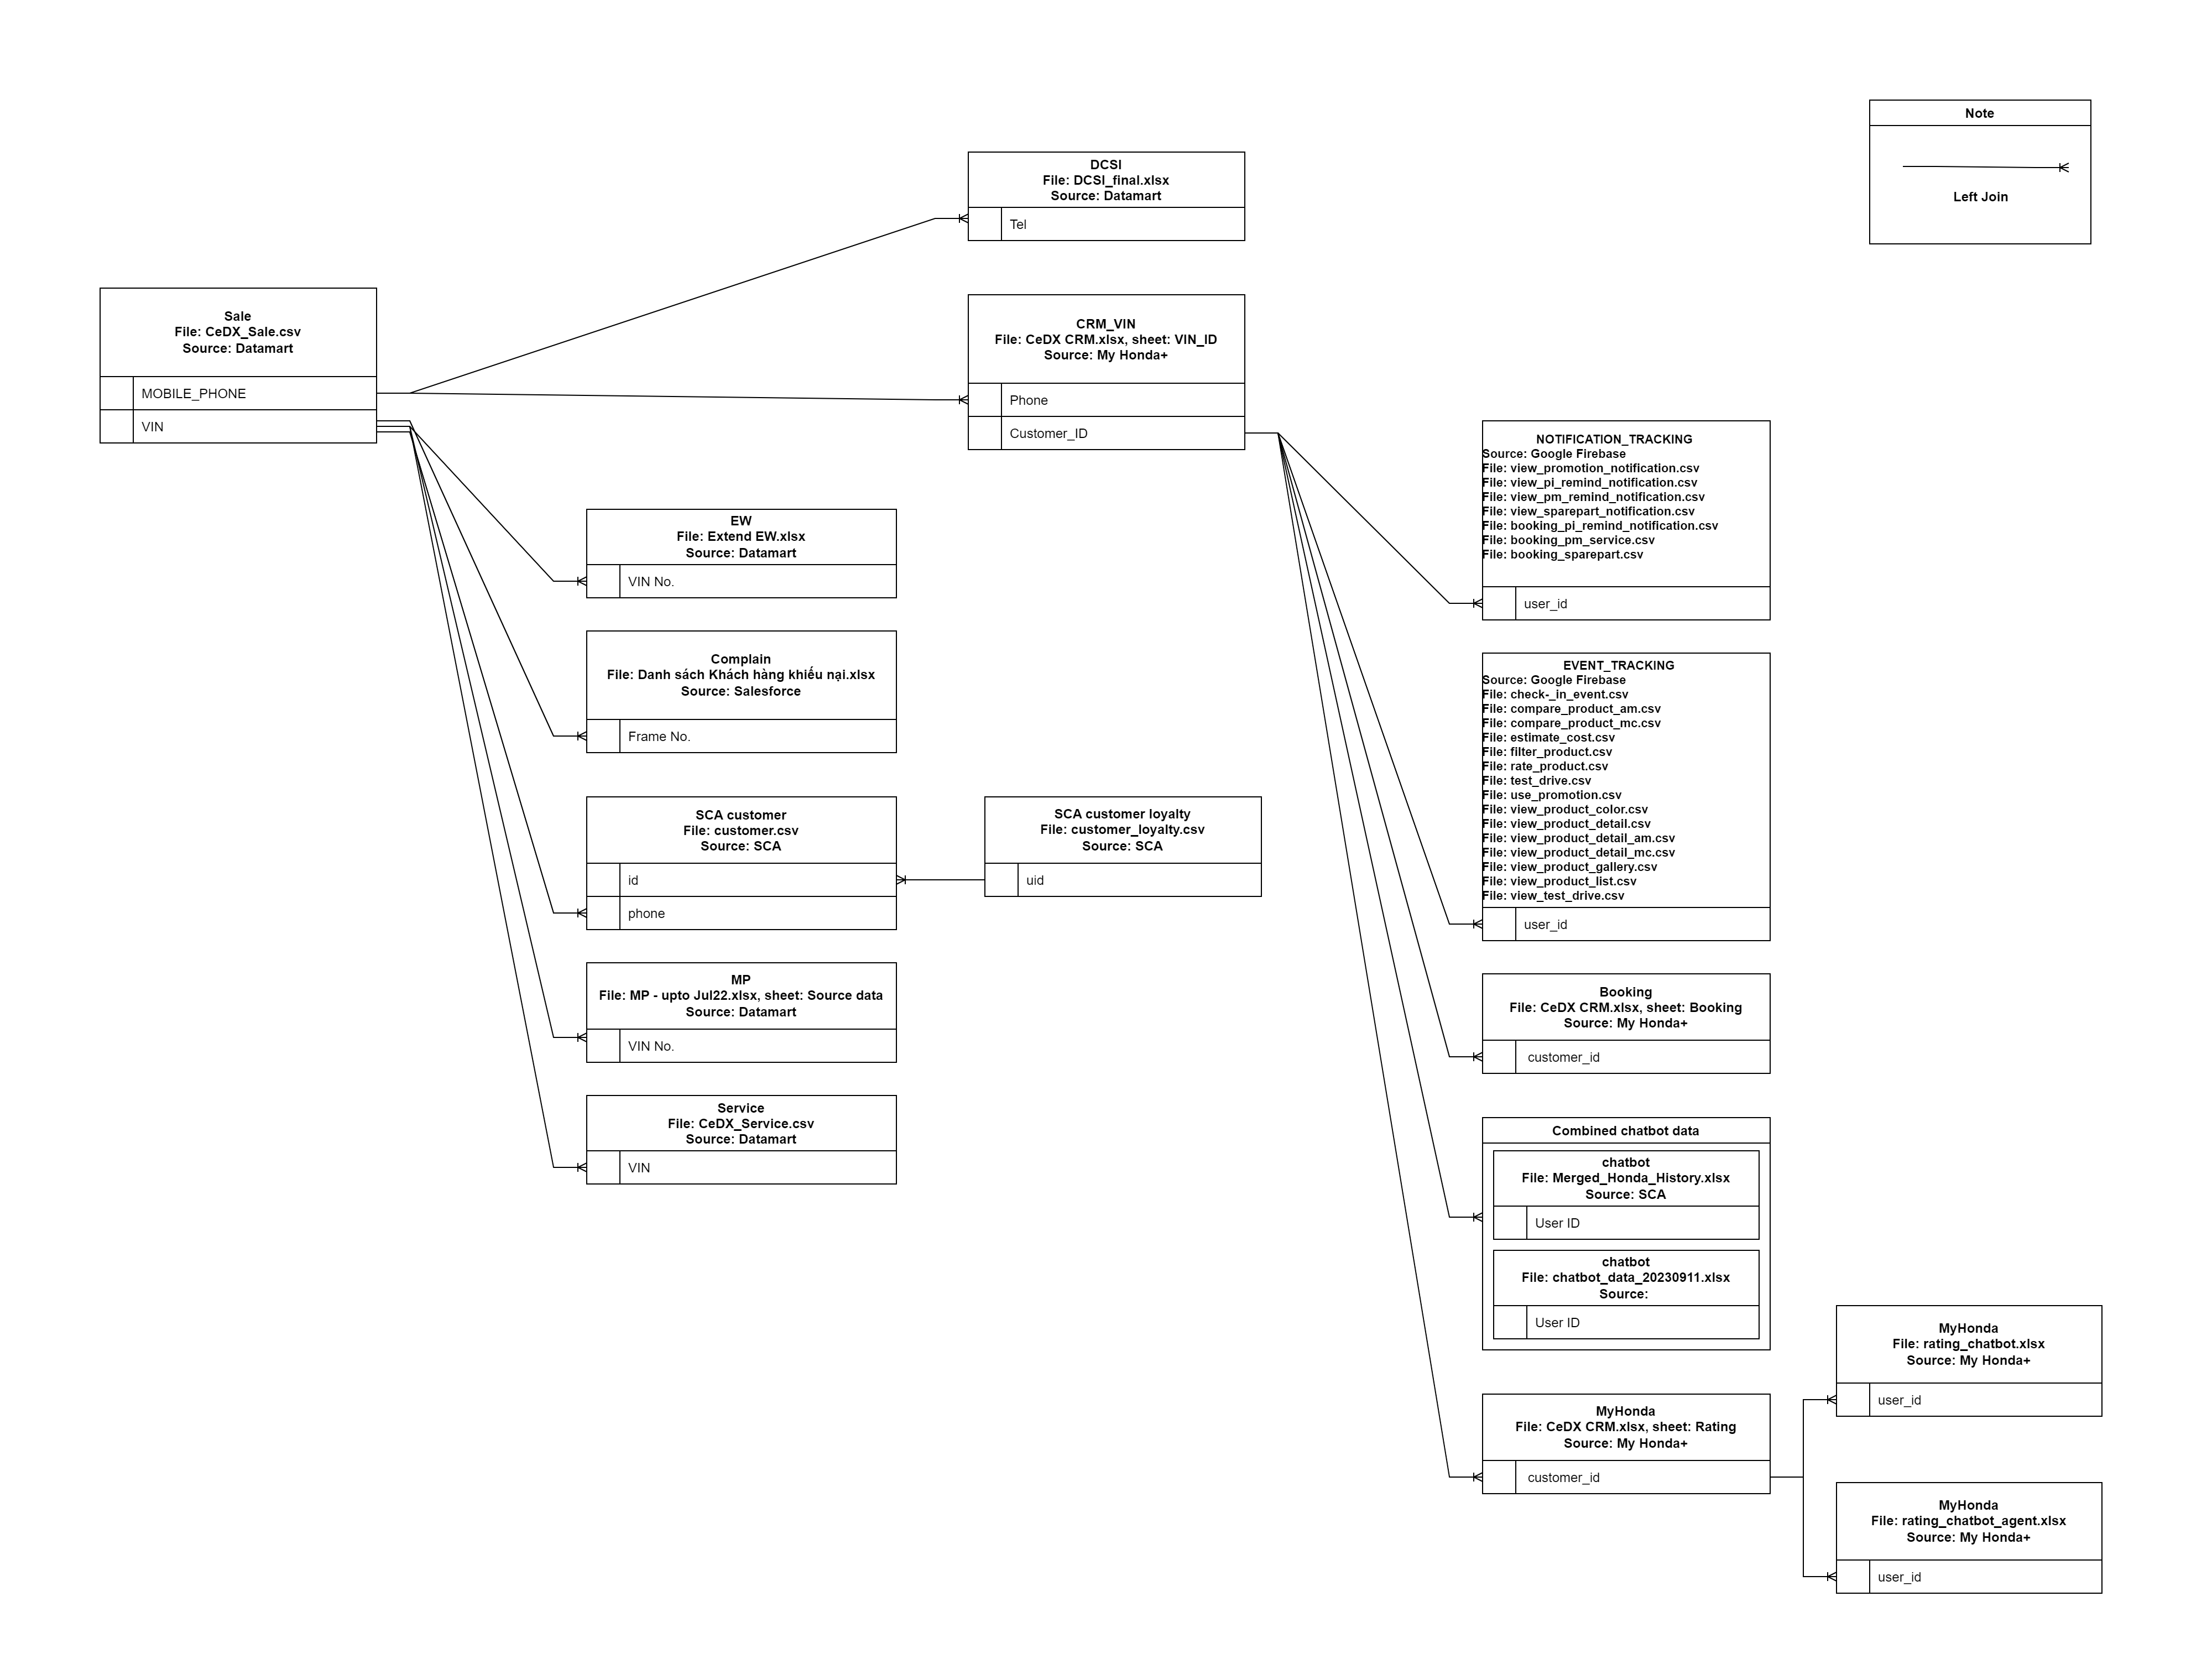

In [12]:
def remove_non_numeric_chars(input_string):
    #return ''.join(char for char in input_string if char.isdigit())
    return setts.remove_non_numeric_chars(input_string)

def modify_phone_num_column(df, col):
#     df[col] = df[col].apply(lambda x: remove_non_numeric_chars(str(x))).dropna()
#     df = df[df[col] != '']
#     df[col] = df[col].astype(np.longlong).astype(str)
#     return df
    return setts.modify_phone_num_column(df, col)

In [13]:
sale = pd.read_csv(input_tmp_folder + '/CeDX_Sale.csv')
sale['WARRANTY_START_DATE'] = sale['WARRANTY_START_DATE'].astype(str).str.replace('-', '').astype(int)
sale = sale[sale['WARRANTY_START_DATE'] <= setts.month_last]
df_phone_vin = sale[['MOBILE_PHONE', 'VIN']]
df_phone_vin['VIN'] = df_phone_vin['VIN'].astype(str).str.upper()
df_phone_vin = modify_phone_num_column(df_phone_vin, 'MOBILE_PHONE')
print(df_phone_vin)

C:\Users\AO_HVN_ITS_LABO_DWH\AppData\Local\Temp\ipykernel_5152\3253413038.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  sale = pd.read_csv(input_tmp_folder + '/CeDX_Sale.csv')


       MOBILE_PHONE                VIN
0         915323818  RLHRM3857DY200927
1         974781359  RLHFD16236Y000646
2         947977388  RLHFD15296Y000880
3         988554348  RLHFD26326Y000538
4         903255511  RLHFD15236Y000048
...             ...                ...
234380    386729113  RLHRS3842PY002175
234381    949580595  RLHGN2644PY200249
234382    928866633  RLHRS382XPY000155
234383    989117287  RLHGN2640PY200247
234384    983323698  RLHRS3845PY002140

[230539 rows x 2 columns]


In [14]:
# ĐỔI TÊN CỘT VIN VÀ CUSTOMER_ID
# VIN CustomerID

crm_vin = pd.read_excel(input_tmp_folder + '/CeDX CRM.xlsx', sheet_name='VIN_ID')
crm_vin = crm_vin.rename(columns={' vin':'VIN', '# customer_id' : 'CustomerID'})
crm_vin['VIN'] = crm_vin['VIN'].astype(str).str.upper()
crm_vin = pd.merge(crm_vin, right=df_phone_vin, how='left', on='VIN').drop(columns=['VIN']).rename(columns={'CustomerID' : 'Customer_ID', 'MOBILE_PHONE' : 'Phone'})
crm_phone = pd.read_excel(input_tmp_folder + '/CeDX CRM.xlsx', sheet_name='Phone_ID')
crm_phone = pd.concat([crm_phone, crm_vin], ignore_index=True, axis=0).drop_duplicates(subset=['Customer_ID'],keep='last')
crm_phone = modify_phone_num_column(crm_phone, 'Phone')[['Customer_ID', 'Phone']]
crm_phone['Customer_ID'] = crm_phone['Customer_ID'].astype(str).str.replace('.0', '', regex=False)
print(crm_phone)

       Customer_ID      Phone
105525        2398  903742262
105526        2438  912862326
105527        2624  903216545
105528        2651  903753422
105530        2700  943618618
...            ...        ...
254914    10059670   94408486
254915      430385  906585373
254916    10721856  941976156
254917     3530678  976970354
254918    10559738  369881828

[129713 rows x 2 columns]


In [15]:
def get_files_in_folder(folder_path):
    file_list = []
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):
            file_list.append(file_name)
    return file_list


def process_file(files, df_phone_vin, output_path, left='user_id', right='Customer_ID', out_prepend='output', rename=None):
    for file in files:
        name = file.split('/')[-1].split('.')[0]
        df = pd.read_csv(file)
        df = df[df['event_date'] <= setts.month_last]
        df[left] = df[left].astype(str)
        df = pd.merge(df, right=df_phone_vin, how='left', left_on=left, right_on=right)
        df = df.dropna(subset=['Phone']).rename(columns={'Phone' : 'UID'})
        if rename is None:
            output = output_path + '/' + name + out_prepend + '.csv'
        else:
            try:
                output = output_path + '/' + rename[name] + out_prepend + '.csv'
            except:
                output = output_path + '/' + name + out_prepend + '.csv'
        print(output)
        df.to_csv(output, index=False)

input_filename_list = {
	"view_promotion_notification" : "event_v_promo", #  view_promotion_notification
	"view_pi_remind_notification" : "notif_vpi", # " : view_pi_remind_notification
	"view_pm_remind_notification" : "notif_vpm", # " : view_pm_remind_notification
	"view_promotion_notification" : "notif_v_pro", # " : view_promotion_notification
	"view_sparepart_notification" : "notif_v_spa", # " : view_sparepart_notification
	"booking_pi_remind_notification" : "notif_book_pi", # " : booking_pi_remind_notification
	"booking_pm_service" : "notif_book_pm", # " : booking_pm_service
	"booking_sparepart" : "notif_book_spa", # booking_sparepart
}

In [17]:
# Event_tracking
folder_path = r'\\hvn-file01-prd\ADM IT\Project Document\2022_CeDX engagement\09.Project_Management\9. Upate Data\Feb_2024\4. My Honda\event tracking'
files = get_files_in_folder(folder_path)
files_path = [folder_path + '/' + i for i in files]
process_file(files_path[:], crm_phone, output_folder, out_prepend='', rename=input_filename_list)

D:\Software\temp\CeDX\data_2024_05/data/tmp/checkin_event.csv
D:\Software\temp\CeDX\data_2024_05/data/tmp/compare_product_am.csv
D:\Software\temp\CeDX\data_2024_05/data/tmp/compare_product_mc.csv
D:\Software\temp\CeDX\data_2024_05/data/tmp/estimate_cost.csv
D:\Software\temp\CeDX\data_2024_05/data/tmp/filter_product.csv
D:\Software\temp\CeDX\data_2024_05/data/tmp/rate_product.csv
D:\Software\temp\CeDX\data_2024_05/data/tmp/test_drive.csv
D:\Software\temp\CeDX\data_2024_05/data/tmp/use_promotion.csv
D:\Software\temp\CeDX\data_2024_05/data/tmp/view_product_color.csv


C:\Users\AO_HVN_ITS_LABO_DWH\AppData\Local\Temp\ipykernel_5152\3923363448.py:13: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


D:\Software\temp\CeDX\data_2024_05/data/tmp/view_product_detail_am.csv
D:\Software\temp\CeDX\data_2024_05/data/tmp/view_product_detail_mc.csv
D:\Software\temp\CeDX\data_2024_05/data/tmp/view_product_gallery.csv
D:\Software\temp\CeDX\data_2024_05/data/tmp/view_product_list.csv
D:\Software\temp\CeDX\data_2024_05/data/tmp/view_test_drive.csv


In [18]:
# Notification_tracking

folder_path = r'\\hvn-file01-prd\ADM IT\Project Document\2022_CeDX engagement\09.Project_Management\9. Upate Data\Feb_2024\4. My Honda\notification tracking'
files = get_files_in_folder(folder_path)
files_path = [folder_path + '/' + i for i in files]
process_file(files_path[:], crm_phone, output_folder, out_prepend='', rename=input_filename_list)

df_copy = pd.read_csv(output_folder + '/notif_v_pro.csv')
df_copy.to_csv(output_folder + '/event_v_promo.csv', index=False)
df_copy.to_csv(output_folder + '/view_promotion_notification.csv', index=False)


D:\Software\temp\CeDX\data_2024_05/data/tmp/notif_book_pi.csv
D:\Software\temp\CeDX\data_2024_05/data/tmp/notif_book_pm.csv
D:\Software\temp\CeDX\data_2024_05/data/tmp/notif_book_spa.csv
D:\Software\temp\CeDX\data_2024_05/data/tmp/notif_vpi.csv
D:\Software\temp\CeDX\data_2024_05/data/tmp/notif_vpm.csv
D:\Software\temp\CeDX\data_2024_05/data/tmp/notif_v_pro.csv
D:\Software\temp\CeDX\data_2024_05/data/tmp/notif_v_spa.csv


In [19]:
#EW
ew = pd.read_excel(input_tmp_folder + '/Extend EW.xlsx')
ew = ew[ew['EW BUYING'] <= setts.month_last_dt]
ew['VIN No.'] = ew['VIN No.'].astype(str).str.upper()
ew = pd.merge(ew, right=df_phone_vin, how='left', left_on= 'VIN No.',right_on='VIN').rename(columns={'CustomerID' : 'Customer_ID', 'MOBILE_PHONE' : 'Phone'})
ew = ew.dropna(subset=['Phone']).rename(columns={'Phone' : 'UID'})
ew.to_csv(output_folder + '/ew.csv', index=False)

In [20]:
# Complain
path = input_tmp_folder + '/Danh sách Khách hàng khiếu nại.xlsx'
comp = pd.read_excel(path, sheet_name='Database report')
comp['Date Receive'] = comp['Date Receive'].astype(str).apply(lambda x: datetime.strptime(x, '%m/%d/%Y, %I:%M %p'))
comp = comp[comp['Date Receive'] <= setts.month_last_dt]
comp['Frame No'] = comp['Frame No'].astype(str).str.upper()
comp = pd.merge(comp, right=df_phone_vin, how='left', left_on= 'Frame No',right_on='VIN').rename(columns={'CustomerID' : 'Customer_ID', 'MOBILE_PHONE' : 'Phone'})
comp = comp.dropna(subset=['Phone'])
comp = comp.rename(columns={'Phone' : 'UID', 'Date Sending' : 'Date/Time Opened', 'CR Code Full Name' : 'CR Code Full'})
comp.to_csv(output_folder + '/comp.csv', index=False)

In [21]:
#SCA
sca1 = pd.read_csv(input_tmp_folder + '/customer_loyalty.csv')
# sca1['start_date'] = sca1['start_date'].astype(str).apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
sca1['start_date'] = sca1['start_date'].astype(str).apply(lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M'))
sca1 = sca1[sca1['start_date'] <= setts.month_last_dt]

sca2 = pd.read_csv(input_tmp_folder + '/customer.csv', encoding='utf-8', on_bad_lines='skip')
###### NO DATE COLUMN #####


sca = pd.merge(sca1, right=sca2, how='left', left_on= 'uid',right_on='id').rename(columns={'uid' : 'Customer_ID', 'phone' : 'Phone'})
# sca['Phone'] = sca['Phone'].astype(str).str.replace('[^0-9]', '')
# sca = sca[sca['Phone'] != '']
# sca['Phone'] = sca['Phone'].astype(float).astype(str)

sca = modify_phone_num_column(sca, 'Phone')

sca = pd.merge(sca, right=df_phone_vin, how='left', left_on= 'Phone',right_on='MOBILE_PHONE')

sca = sca.dropna(subset=['MOBILE_PHONE']).rename(columns={'MOBILE_PHONE' : 'UID'})
sca.to_csv(output_folder + '/sca.csv', index=False)

In [22]:
# Booking service
booking = pd.read_excel(input_tmp_folder + '/CeDX CRM.xlsx', sheet_name='Booking')
booking.columns = [x.strip() for x in booking.columns.tolist()]
print('File read')
booking = booking[booking['booking_date'].astype(str).str.match(r'\d\d\d\d-\d{1,2}-\d{1,2}')]
booking['booking_date'] = booking['booking_date'].astype(str).apply(lambda x: datetime.strptime(x[:10], '%Y-%m-%d'))
booking = booking[booking['booking_date'] <= setts.month_last_dt]
booking['customer_id'] = booking['customer_id'].astype(str)
booking = pd.merge(booking, right=crm_phone, how='left', left_on= 'customer_id',right_on='Customer_ID')
booking = booking.dropna(subset=['Phone']).rename(columns={'Phone' : 'UID'})
booking.to_csv(output_folder + '/book.csv', index=False)

C:\Users\AO_HVN_ITS_LABO_DWH\AppData\Local\Temp\ipykernel_5152\1136815650.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  booking = pd.read_excel(input_tmp_folder + '/CeDX CRM.xlsx', sheet_name='Booking')


File read


In [23]:
# MyHonda

mh = pd.read_excel(input_tmp_folder + '/CeDX CRM.xlsx', sheet_name='Rating')
mh.columns = [x.replace("# ", '').strip() for x in mh.columns.tolist()]
mh['customer_id'] = mh['customer_id'].astype(str)
mh = pd.merge(mh, right=crm_phone, how='left', left_on= 'customer_id',right_on='Customer_ID')

mh = mh.dropna(subset=['Phone']).rename(columns={'Phone' : 'UID'})
mh['ro_order'] = mh['ro_order'].astype(str)
mh = mh.sort_values(by=['ro_order'])
mh = mh.drop_duplicates(subset=['UID'], keep='last')

mh_chatbot = pd.read_excel(input_tmp_folder + '/rating_chatbot.xlsx')
mh_chatbot = mh_chatbot.drop(['Unnamed: 0'], axis=1, errors='ignore')
print(mh_chatbot.head(5))
mh_chatbot['Sender ID'] = mh_chatbot['Sender ID'].astype(str)

mh_chatbot = pd.merge(mh_chatbot, right=crm_phone, how='left', left_on= 'Sender ID',right_on='Customer_ID')
mh_chatbot = mh_chatbot.dropna(subset=['Phone']).rename(columns={'Phone' : 'UID', 'Rated' : 'rate_chatbot_point'})
mh_chatbot['Time'] = pd.to_datetime(mh_chatbot['Time'], format='%H:%M - %d/%m/%Y')
mh_chatbot = mh_chatbot.sort_values('Time', ascending=True)
mh_chatbot = mh_chatbot.drop_duplicates(subset=['Time'], keep='last')
mh_chatbot = mh_chatbot[['UID', 'rate_chatbot_point']]

mh_chatbot_agent = pd.read_excel(input_tmp_folder + '/rating_chatbot_agent.xlsx')
mh_chatbot_agent = mh_chatbot_agent.drop(['Unnamed: 0'], axis=1, errors='ignore')

mh_chatbot_agent['Sender ID'] = mh_chatbot_agent['Sender ID'].astype(str)

mh_chatbot_agent = pd.merge(mh_chatbot_agent, right=crm_phone, how='left', left_on= 'Sender ID',right_on='Customer_ID')
mh_chatbot_agent = mh_chatbot_agent.dropna(subset=['Phone']).rename(columns={'Phone' : 'UID', 'Rated' : 'rate_chatbot_agent_point'})
mh_chatbot_agent['Time'] = pd.to_datetime(mh_chatbot_agent['Time'], format='%H:%M - %d/%m/%Y')
mh_chatbot_agent = mh_chatbot_agent.sort_values('Time', ascending=True)
mh_chatbot_agent = mh_chatbot_agent.drop_duplicates(subset=['Time'], keep='last')
mh_chatbot_agent = mh_chatbot_agent[['UID', 'rate_chatbot_agent_point']].fillna(0)

mh = pd.merge(mh, right=mh_chatbot, how='left', left_on= 'UID',right_on='UID')
mh = pd.merge(mh, right=mh_chatbot_agent, how='left', left_on= 'UID',right_on='UID')

# Remove redundant space from column name
mh.columns = [i.strip() for i in mh.columns.tolist()]
mh['rate_point_service'] = mh['rate_point_service'].astype(str).str.replace('NULL', '0')
mh['rate_point_mechanic'] = mh['rate_point_mechanic'].astype(str).str.replace('NULL', '0')
mh['rate_chatbot_point'] = mh['rate_chatbot_point'].fillna(0).astype(str).str.replace('NULL', '0')
mh['rate_chatbot_agent_point'] = mh['rate_chatbot_agent_point'].fillna(0).astype(str).str.replace('NULL', '0')
mh = mh.rename(columns={'rate_point_service' : 'rate_service_point', 'rate_point_mechanic' : 'rate_mechanic_point'})
mh.to_csv(output_folder + '/MH.csv', index=False)

                 Time   Channel  Sender ID    Sender Name  Rated
0  23:56 - 30/09/2023  livechat    9218284            NaN      5
1  23:35 - 30/09/2023  livechat    5758145            NaN      5
2  23:21 - 30/09/2023  livechat    9160856  LÊ MINH TRUNG      5
3  23:03 - 30/09/2023  livechat    8280503            NaN      5
4  22:47 - 30/09/2023  livechat    9204313            NaN      5


In [24]:
def filter_df_date(df, date_cut, col, sub='date_to_num'):
	df = df.dropna(subset=[col])
	df = df[~df[col].str.contains('[A-Za-z]')]
	df[sub] = df[col].apply(lambda x: date_to_num(x.split(' ')[0]))
	df = df[df[sub] < date_cut]
	df.drop(columns=[sub], inplace=True)
	return df

def date_to_num(date_str):
    if '-' in date_str:
        return int(date_str.replace('-', ''))
    elif '//' in date_str:
        date = date_str.split('//')
        return int(date[2] + pad0(date[0]) + pad0(date[1]))
    elif '.' in date_str:
        date = date_str.split('.')
        return int(date[2] + pad0(date[1]) + pad0(date[0]))
def pad0(data):
	data = str(data)
	if len(data) == 1:
		data = '0' + data
	return data

In [25]:
# MP

mp = pd.read_excel(input_tmp_folder + '/MP - upto Jul22.xlsx', sheet_name='Source data', skiprows=1)
vin = 'VIN No.'
mp[vin] = mp[vin].astype(str).str.upper()
cname = ["Month", "DLR", "Count", "DLR.1", vin ,"Model", "Ngay ban_tang PM package", "Ngay dang ky Warranty Date", "Km", "New Car", "Servicecar", "2Cap", "4Cap", "Khac", "Lan 1", "Lan 2", "Lan 3", "Lan 4", "Lan 5", "Lan 6", "Khac.1", "Gia ban", "Ghi chu"]
mp.columns = cname
#print(mp['Ngay ban_tang PM package'])
#mp = mp[mp['Ngay ban_tang PM package'].astype(str).str.match(r'\d{1,2}/\d{1,2}/\d\d\d\d')]
#mp['Ngay ban_tang PM package'] = mp['Ngay ban_tang PM package'].astype(str).apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))
mp['Ngay ban_tang PM package'] = mp['Ngay ban_tang PM package'].astype(str)
mp = filter_df_date(mp, setts.month_last, 'Ngay ban_tang PM package')


mp = pd.merge(mp, right=df_phone_vin, how='left', left_on= vin,right_on='VIN').rename(columns={'CustomerID' : 'Customer_ID', 'MOBILE_PHONE' : 'Phone'})
mp = mp.dropna(subset=['Phone'])
mp = mp.rename(columns={'Phone' : 'UID'})
mp.to_csv(output_folder + '/mp.csv', index=False)

In [26]:
# DCSI

dcsi = pd.read_excel(input_tmp_folder + '/DCSI_final.xlsx')
dsci = dcsi.drop(['Unnamed: 0'], axis=1, errors='ignore')
dsci['Year'] = dsci['Year'].astype(str).apply(lambda x: x.replace('Mười chín', '2019')).astype(int)
dsci = dsci[dsci['Year'].astype(int) <= setts.year_limit]
phone = 'Tel'
dsci = modify_phone_num_column(dsci, phone)
fake = df_phone_vin['MOBILE_PHONE'].copy().astype(np.float64)

dcsi = pd.merge(dcsi, right=fake, how='left', left_on=phone , right_on='MOBILE_PHONE')
dcsi = dcsi.dropna(subset=['MOBILE_PHONE'])
dcsi = dcsi.rename(columns={'MOBILE_PHONE' : 'UID'})
dsci = modify_phone_num_column(dsci, phone)


columns = dcsi.columns.tolist()
dcsi.columns = [i.replace(' ', '_') for i in columns]
dcsi.to_csv(output_folder + '/DCSI.csv', index=False)

In [27]:
INPUTPATH = input_tmp_folder + "/merged_chatbot_data.csv"
chat_og = pd.read_csv(INPUTPATH)


In [28]:
# chatbot
chat=chat_og.copy()
chat = chat.dropna(subset=['Request time'])
chat['Request time'] = chat['Request time'].astype(str).apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
chat = chat[chat['Request time'] <= setts.month_last_dt]
fake = crm_phone.copy()
fake['Customer_ID'] = fake['Customer_ID'].astype(str).str.replace('.0', '', regex=False)
chat = chat.drop(['Business'], axis=1)

collist = ['Request time','User ID','Business Field','Field']
chat = chat[collist]
chat = chat.rename(columns={'Business Field' : 'Business'})
#chat = pd.concat([chat, chat1], ignore_index=True, axis=0)
display(chat)


chat = pd.merge(chat, right=fake, how='left', left_on= 'User ID',right_on='Customer_ID')
chat = chat.dropna(subset=['Phone']).rename(columns={'Phone' : 'UID'})
display(chat)

chat.to_csv(output_folder + '/chat.csv', index=False)

,Request time,User ID,Business,Field
0,2020-08-13 15:41:37,1828025,AM,Product
1,2020-08-13 15:41:31,1828025,NaN,Other
3,2020-08-13 15:41:26,762147,MC,Product
5,2020-08-13 15:41:14,762147,MC,Product
6,2020-08-13 15:41:07,1729586,MC,Product
...,...,...,...,...
11147503,2024-02-19 16:39:31,10036694,NaN,Other
11147505,2024-02-19 16:39:10,10129422,NaN,Other
11147507,2024-02-19 16:38:58,7801238,NaN,Other
11147509,2024-02-19 16:38:54,10173278,NaN,Other


,Request time,User ID,Business,Field,Customer_ID,UID
56,2020-08-13 15:24:25,1726407,NaN,Other,1726407,943951975
77,2020-08-13 15:19:09,732014,NaN,Other,732014,989847400
107,2020-08-13 15:11:10,48531,NaN,Other,48531,974386479
126,2020-08-13 15:04:42,533460,NaN,Other,533460,988159111
132,2020-08-13 15:01:48,118769,NaN,Other,118769,912391525
...,...,...,...,...,...,...
5713901,2024-02-19 17:18:54,4366054,NaN,Other,4366054,368290719
5713904,2024-02-19 17:18:40,4366054,NaN,Other,4366054,368290719
5713905,2024-02-19 17:18:36,4366054,NaN,Other,4366054,368290719
5713919,2024-02-19 17:15:31,681595,NaN,Other,681595,982676098
